In [15]:
import pandas as pd

df_train = pd.read_csv('./data/2454.TW_train.csv', index_col='Date')
df_test = pd.read_csv('./data/2454.TW_test.csv', index_col='Date')

print(df_train.head())
print(df_test.head())

             Open   High    Low  Close   Adj Close     Volume
Date                                                         
2014-05-20  494.5  499.0  491.0  492.0  296.165680  4734000.0
2014-05-21  493.5  496.0  488.0  488.5  294.058777  5048000.0
2014-05-22  495.0  505.0  492.0  505.0  303.991150  7338000.0
2014-05-23  503.0  505.0  497.0  498.5  300.078430  4988000.0
2014-05-26  500.0  502.0  494.5  494.5  297.670593  4488000.0
             Open   High    Low  Close   Adj Close    Volume
Date                                                        
2023-05-22  702.0  709.0  701.0  705.0  620.303040   4440987
2023-05-23  710.0  722.0  708.0  716.0  629.981506   5240558
2023-05-24  713.0  713.0  701.0  711.0  625.582153   5640355
2023-05-25  708.0  718.0  706.0  708.0  622.942566   4666860
2023-05-26  708.0  737.0  708.0  730.0  642.299561  10749900


In [16]:
# 清除缺失值
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [17]:
X_train_set = df_train['Adj Close'].values
X_test_set = df_test['Adj Close'].values

print(X_train_set[:10])
print(X_test_set[:10])

[296.16568  294.058777 303.99115  300.07843  297.670593 306.399048
 305.797058 299.777435 293.155853 296.16568 ]
[620.30304  629.981506 625.582153 622.942566 642.299561 649.33844
 671.335022 667.815613 658.137085 660.776672]


In [18]:
# 正規化
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X_train_set = sc.fit_transform(X_train_set.reshape(-1, 1))
X_test_set = sc.fit_transform(X_test_set.reshape(-1, 1))

print(X_train_set[:10])
print(X_test_set[:10])

[[0.20589413]
 [0.20334428]
 [0.21536483]
 [0.2106295 ]
 [0.20771544]
 [0.21827896]
 [0.21755041]
 [0.21026522]
 [0.20225152]
 [0.20589413]]
[[0.        ]
 [0.01587422]
 [0.00865859]
 [0.00432924]
 [0.03607779]
 [0.04762267]
 [0.08370057]
 [0.07792818]
 [0.06205385]
 [0.06638319]]


In [19]:
import numpy as np

# 訓練集

train_days = 60

X_train_data, Y_train_data = [], []

for i in range(len(X_train_set) - train_days - 1):
    X_train_data.append(X_train_set[i:i + train_days])
    Y_train_data.append(X_train_set[i + train_days + 1])

X_train_data = np.array(X_train_data)
Y_train_data = np.array(Y_train_data)

print(f'X_train_data shape: {X_train_data.shape}')
print(f'Y_train_data shape: {Y_train_data.shape}')

# 測試集

X_test_data, Y_test_data = [], []

for i in range(len(X_test_set) - train_days - 1):
    X_test_data.append(X_test_set[i:i + train_days])
    Y_test_data.append(X_test_set[i + train_days + 1])

X_test_data = np.array(X_test_data)
Y_test_data = np.array(Y_test_data)

print(f'X_test_data shape: {X_test_data.shape}')
print(f'Y_test_data shape: {Y_test_data.shape}')

X_train_data shape: (2136, 60, 1)
Y_train_data shape: (2136, 1)
X_test_data shape: (181, 60, 1)
Y_test_data shape: (181, 1)


In [20]:
print(X_train_data[0])
print(Y_train_data[0])
print('-' * 70)
print(X_train_data[1])
print(Y_train_data[1])

[[0.20589413]
 [0.20334428]
 [0.21536483]
 [0.2106295 ]
 [0.20771544]
 [0.21827896]
 [0.21755041]
 [0.21026522]
 [0.20225152]
 [0.20589413]
 [0.20480131]
 [0.21682193]
 [0.21172229]
 [0.21827896]
 [0.21900744]
 [0.21609331]
 [0.21172229]
 [0.21172229]
 [0.20917243]
 [0.21900744]
 [0.22119302]
 [0.2248356 ]
 [0.21827896]
 [0.21973595]
 [0.21536483]
 [0.21536483]
 [0.22265001]
 [0.21245069]
 [0.21536483]
 [0.21755041]
 [0.2248356 ]
 [0.23722039]
 [0.2417176 ]
 [0.24546525]
 [0.23871952]
 [0.23647086]
 [0.23347274]
 [0.2229792 ]
 [0.22447826]
 [0.21923163]
 [0.21998108]
 [0.21848206]
 [0.2252279 ]
 [0.22747653]
 [0.2349718 ]
 [0.2349718 ]
 [0.23197371]
 [0.22747653]
 [0.22447826]
 [0.22073069]
 [0.22372881]
 [0.19899417]
 [0.21960639]
 [0.21623347]
 [0.21248582]
 [0.22447826]
 [0.21623347]
 [0.21510917]
 [0.21848206]
 [0.21435964]]
[0.22222975]
----------------------------------------------------------------------
[[0.20334428]
 [0.21536483]
 [0.2106295 ]
 [0.20771544]
 [0.21827896]
 [0.2

In [21]:
import tensorflow as tf

# gpu
import tensorflow as tf
print(tf.test.is_gpu_available())

True


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Flatten


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss="mae", optimizer="adam")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               7808      
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train_data, Y_train_data, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
67/67 - 0s - loss: 0.0406 - 426ms/epoch - 6ms/step
Epoch 2/100
67/67 - 0s - loss: 0.0206 - 167ms/epoch - 2ms/step
Epoch 3/100
67/67 - 0s - loss: 0.0185 - 168ms/epoch - 3ms/step
Epoch 4/100
67/67 - 0s - loss: 0.0197 - 155ms/epoch - 2ms/step
Epoch 5/100
67/67 - 0s - loss: 0.0170 - 174ms/epoch - 3ms/step
Epoch 6/100
67/67 - 0s - loss: 0.0166 - 158ms/epoch - 2ms/step
Epoch 7/100
67/67 - 0s - loss: 0.0172 - 163ms/epoch - 2ms/step
Epoch 8/100
67/67 - 0s - loss: 0.0168 - 162ms/epoch - 2ms/step
Epoch 9/100
67/67 - 0s - loss: 0.0162 - 164ms/epoch - 2ms/step
Epoch 10/100
67/67 - 0s - loss: 0.0169 - 167ms/epoch - 2ms/step
Epoch 11/100
67/67 - 0s - loss: 0.0187 - 162ms/epoch - 2ms/step
Epoch 12/100
67/67 - 0s - loss: 0.0167 - 156ms/epoch - 2ms/step
Epoch 13/100
67/67 - 0s - loss: 0.0150 - 172ms/epoch - 3ms/step
Epoch 14/100
67/67 - 0s - loss: 0.0148 - 178ms/epoch - 3ms/step
Epoch 15/100
67/67 - 0s - loss: 0.0152 - 168ms/epoch - 3ms/step
Epoch 16/100
67/67 - 0s - loss: 0.0173 - 169ms/ep

In [38]:
X_test_data_pred = model.predict(X_test_data)
Y_test_data_pred_price = Y_test_data

6/6 [==============================] - 0s 2ms/step


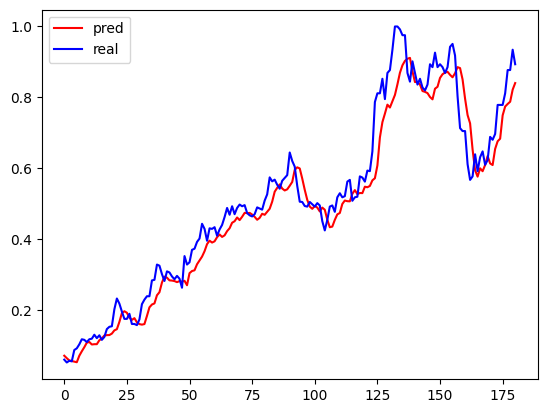

In [39]:
import matplotlib.pyplot as plt

plt.plot(X_test_data_pred, color="red", label="pred")
plt.plot(Y_test_data_pred_price, color="blue", label="real")
plt.legend()
plt.show()

In [40]:
# LSTM
from keras.models import Sequential
from keras.layers import LSTM

LSTM_model = Sequential()
LSTM_model.add(LSTM(128, activation='relu', input_shape=(X_train_data.shape[1], X_train_data.shape[2])))
LSTM_model.add(Dense(1, activation='relu'))
LSTM_model.summary()
LSTM_model.compile(loss="mae", optimizer="adam")

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [41]:
LSTM_history = LSTM_model.fit(X_train_data, Y_train_data, epochs=10, batch_size=64, verbose=2)

Epoch 1/10
34/34 - 4s - loss: 0.0920 - 4s/epoch - 126ms/step
Epoch 2/10
34/34 - 3s - loss: 0.0209 - 3s/epoch - 101ms/step
Epoch 3/10
34/34 - 4s - loss: 0.0177 - 4s/epoch - 104ms/step
Epoch 4/10
34/34 - 3s - loss: 0.0175 - 3s/epoch - 96ms/step
Epoch 5/10
34/34 - 3s - loss: 0.0161 - 3s/epoch - 102ms/step
Epoch 6/10
34/34 - 3s - loss: 0.0162 - 3s/epoch - 96ms/step
Epoch 7/10
34/34 - 3s - loss: 0.0166 - 3s/epoch - 96ms/step
Epoch 8/10
34/34 - 4s - loss: 0.0156 - 4s/epoch - 111ms/step
Epoch 9/10
34/34 - 4s - loss: 0.0155 - 4s/epoch - 108ms/step
Epoch 10/10
34/34 - 4s - loss: 0.0152 - 4s/epoch - 107ms/step


In [42]:
X_test_data_pred = LSTM_model.predict(X_test_data)
Y_test_data_pred_price = Y_test_data

6/6 [==============================] - 0s 20ms/step


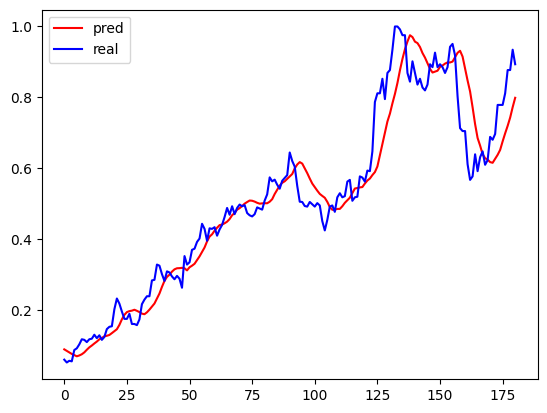

In [43]:
plt.plot(X_test_data_pred, color="red", label="pred")
plt.plot(Y_test_data_pred_price, color="blue", label="real")
plt.legend()
plt.show()

In [62]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

rnn_model = Sequential()
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(16))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               7808      
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________


In [63]:
rnn_model.fit(X_train_data, Y_train_data, epochs=10, batch_size=64, verbose=2)

Epoch 1/10
34/34 - 2s - loss: 0.0361 - 2s/epoch - 57ms/step
Epoch 2/10
34/34 - 1s - loss: 0.0166 - 1s/epoch - 43ms/step
Epoch 3/10
34/34 - 1s - loss: 0.0149 - 1s/epoch - 40ms/step
Epoch 4/10
34/34 - 1s - loss: 0.0145 - 1s/epoch - 40ms/step
Epoch 5/10
34/34 - 1s - loss: 0.0133 - 1s/epoch - 42ms/step
Epoch 6/10
34/34 - 1s - loss: 0.0126 - 1s/epoch - 43ms/step
Epoch 7/10
34/34 - 1s - loss: 0.0126 - 1s/epoch - 42ms/step
Epoch 8/10
34/34 - 1s - loss: 0.0127 - 1s/epoch - 42ms/step
Epoch 9/10
34/34 - 1s - loss: 0.0122 - 1s/epoch - 41ms/step
Epoch 10/10
34/34 - 1s - loss: 0.0120 - 1s/epoch - 42ms/step


In [64]:
X_test_data_pred = rnn_model.predict(X_test_data)
Y_test_data_pred_price = Y_test_data

6/6 [==============================] - 0s 8ms/step


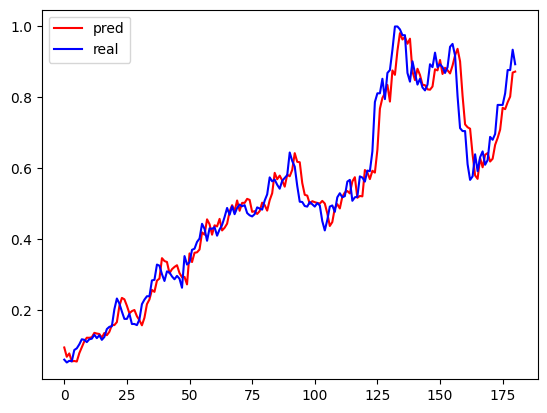

In [65]:
plt.plot(X_test_data_pred, color="red", label="pred")
plt.plot(Y_test_data_pred_price, color="blue", label="real")
plt.legend()
plt.show()